In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('train_ship_segmentations_v3.csv')
df["EncodedPixels"] += ' '


<AxesSubplot:>

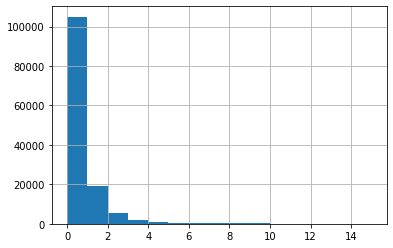

In [17]:
df_by_ships = df.groupby("ImageId", as_index=False).count()
df_by_ships = df_by_ships.rename(columns={"EncodedPixels": "Ships", "ImageId": "Images"})
df_by_ships["Ships"].hist(bins=15)



In [18]:
no_ships = len(df_by_ships.loc[df_by_ships["Ships"] == 0])
with_ships = len(df_by_ships) - no_ships
print(no_ships, with_ships)

104983 29806


We can see that the most images(78%) are without any ships so undersampling images without ships would be good idea

In [19]:
def count_pixels_with_ships(s):
    """
    Arguments:
    s - string of Encoded Pixels
    Returns:
    pixels - amount of pixels that contain ship
    """
    if pd.isna(s):
        return 0
    array = np.asarray([int(x) for x in s.split()])
    pixels = sum(array[1::2])
    return pixels

In [30]:
df_pixels = df['EncodedPixels'].map(count_pixels_with_ships)
pixels_with_ships = sum(df_pixels.iloc)
all_pixels = (no_ships+with_ships)*768*768
print(pixels_with_ships/all_pixels*100, "% of pixels contain ship")

0.11329706569478241 % of pixels contain ship


So $\approx$ 99.89% pixels do not contain ship so we cannot rely on accuracy because if our network marks all pixels as "no ship" then it will be 99.89% accurate but that network will be completely useless. That's why we should use some other metrics like IoU or Dice score